In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: Joachims-MacBook-Pro.local

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python


## Inferenzmethoden in Regression und Korrelation
----------------------------------------

Das lineare Modell ergibt sich aus der Gleichung

$$y = \beta_0 + \beta_1x+e\text{,}$$

Wobei $\beta_0$ der Achsenabschnitt, $\beta_1$ der Regressionskoeffizient und $e$ der Fehlerterm ist. Die beste Regressionsgerade wird durch Anwendung der <a href="https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate">Methode der kleinsten Quadrate</a> gefunden, um die **Summe der quadratischen Fehler (SSE)** zu minimieren, d. h. die quadratische Differenz zwischen der gemessenen Reaktionsvariablen $y$ und der Modellvorhersage $\hat y$ zu minimieren, die wie folgt lautet

$$SSE = \sum_{i=1}^n e_i^2=\sum_{i=1}^n (y - \hat y)^2\text{.}$$

Im Abschnitt über die *lineare Regression* finden Sie weitere Einzelheiten zum linearen Modell.

Wie auch immer, wir müssen anerkennen, dass wir unsere Modelle, in diesem Fall unser lineares Regressionsmodell, auf Beobachtungsdaten aufbauen. Die Daten stammen also aus einer Grundgesamtheit und deren entsprechenden statistischen Eigenschaften, die uns im Allgemeinen unbekannt sind. Jede Beobachtung stellt also eine Ausprägung der Population dar, die mit dem Begriff Zufallsvariable bezeichnet wird.

Betrachten wir ein Beispiel, wie es in der folgenden Abbildung dargestellt ist. In diesem Beispiel sind die Parameter der Grundgesamtheit bekannt, so dass wir ein lineares Regressionsmodell der Form $y=β_0+β_1x=1+0,25x$ erstellen können

Text(0.5, 1.0, 'Grundgesamtheit')

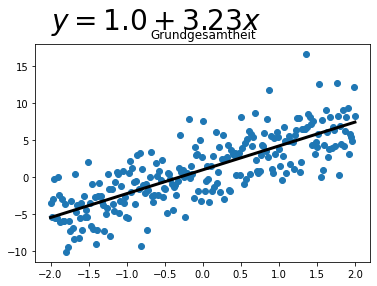

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import linregress


def generate_dataset_simple(intercept, beta, n, std_dev, min_max_x=(-2, 2), seed=None):
    if seed is not None:
        np.random.seed(seed)
    x = np.linspace(min_max_x[0], min_max_x[1], n)
    e = np.random.randn(n) * std_dev
    y = intercept + x * beta + e
    return x, y


x, y = generate_dataset_simple(intercept=1.01, beta=3, n=250, std_dev=3, seed=42)
(slope, intercept, _, _, _) = linregress(x=x, y=y)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, intercept + slope * x, color="k", linewidth=3)
ax.text(s=f"$y={np.round(intercept,2)} + {np.round(slope,2)}x$", x=-2, y=20, size=28)
ax.set_title("Grundgesamtheit")

Wenn wir jedoch eine Zufallsstichprobe aus der Grundgesamtheit nehmen und ein lineares Modell auf der Grundlage der Stichprobendaten erstellen, wird die Regressionslinie der Stichprobe nicht mit der Regressionslinie der Grundgesamtheit übereinstimmen. In der folgenden Abbildung haben wir vier Stichproben mit dem Stichprobenumfang $10$ (blaue Punkte) gezogen. Wir sehen sofort, dass die Regressionslinie der Stichprobe (blaue gestrichelte Linie) nicht mit der Regressionslinie der Grundgesamtheit (graue Linie) übereinstimmt. Um dieser Variabilität Rechnung zu tragen, die auf den Zufallsstichprobenprozess zurückzuführen ist, wird eine Statistik berechnet, indem die folgende Gleichung angewendet wird

$$s_e = \sqrt{\frac{SSE}{n-2}}\text{,}$$

Wobei SSE für die **Summe der quadratischen Fehler** und $n$ für den Stichprobenumfang steht. Die Statistik $s_e$ wird als **Standardfehler der Schätzung** ($s_e$) oder als **Reststandardfehler** bezeichnet.

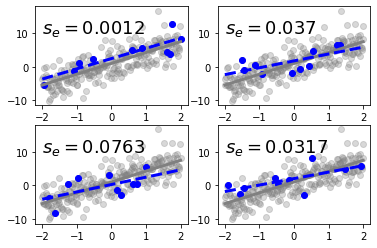

In [2]:
fig, ax = plt.subplots(ncols=2, nrows=2)
ax = np.ravel(ax)

n = 10
np.random.seed(1)
for e in range(4):
    idx = np.random.choice(range(len(x)), size=n, replace=False, p=None)
    ax[e].scatter(x, y, color="gray", alpha=0.3)
    ax[e].plot(x, intercept + slope * x, color="gray", linewidth=3)
    _x = x[idx]
    _y = y[idx]
    ax[e].scatter(_x, _y, color="blue")
    (_slope, _intercept, _, stderr, _) = linregress(x=_x, y=_y)
    ax[e].plot(
        x, _intercept + _slope * x, color="blue", linewidth=3, linestyle="dashed"
    )
    ax[e].text(s=f"$s_e={np.round(stderr,4)}$", x=-2, y=10, size=18)

Wie oben dargestellt, variiert die Regressionsgerade der Stichprobe von einer Stichprobe zur anderen und ist daher eine Zufallsvariable. Ihre Verteilung wird als **Stichprobenverteilung der Steigung der Regressionsgeraden** bezeichnet.

In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: Joachims-MacBook-Pro.local

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python


## Inferenz über die Steigung - Der $t$-Test des Regressionskoeffizienten
----------------------------------------

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import t, linregress

Der **$t$-Test des Regressionskoeffizienten** wird angewendet, um zu prüfen, ob die Steigung $\beta_1$ der Regressionslinie der Grundgesamtheit gleich $0$ ist. Auf der Grundlage dieses Tests können wir entscheiden, ob $x$ ein nützlicher (linearer) Vorhersagewert für $y$ ist.

Die Teststatistik folgt einer $t$-Verteilung mit $df=n-2$ und kann geschrieben werden als

$$t =\frac{\beta_1}{s_b}= \frac{\beta_1}{s_e/\sqrt{\sum(x- \bar x)^2}}\text{,}$$

wobei $\beta_1$ dem Stichprobenregressionskoeffizienten und $s_e$ dem **Reststandardfehler** entspricht $(s_e=\sqrt{\frac{SSE}{n-2}}$ und $SSE = \sum_{i=1}^n e_i^2)$

### Intervall-Schätzung von $\beta_1$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\beta_1$ ist gegeben durch

$$\beta_1 \pm t_{\alpha/2} \times  \frac{s_e}{\sqrt{\sum(x- \bar x)^2}}\text{,}$$

wobei $s_e$ dem **Reststandardfehler** (auch als **Standardfehler der Schätzung** bezeichnet) entspricht.

Der Wert von $t$ ergibt sich aus der $t$-Verteilung für das gegebene Konfidenzniveau und $n-2$ Freiheitsgrade.

### Der $t$-Test des Regressionskoeffizienten: Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den **Regressions-$t$-Test** in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [4]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus 8239 Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und 16 Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary.

Um den $t$-Test des Regressionskoeffizienten zu veranschaulichen, untersuchen wir die Beziehung zwischen zwei Variablen, der Körpergröße der Studenten als Vorhersagevariable und dem Gewicht der Studenten als Antwortvariable. **Die Frage ist, ob die Vorhersagevariable `height` nützlich ist, um Vorhersagen über das Gewicht der Studierenden zu treffen.**

### Vorbereitung der Daten

Zur Datenaufbereitung ziehen wir eine Zufallsstichprobe von $12$ Studenten aus dem Datensatz und erstellen einen `dataframe` mit den zwei Variablen von Interesse (`height` und `weight`). Außerdem stellen wir die Daten in Form eines Streudiagramms dar, um die zugrunde liegende lineare Beziehung zwischen den beiden Variablen zu visualisieren.

In [5]:
# Nehme Stichprobe
n = 12
data = students[["height", "weight"]].sample(n, random_state=2)
data

,height,weight
3594,169,71.7
4152,181,81.0
7136,148,57.8
5100,173,72.1
339,168,70.7
4433,159,66.1
2767,169,69.5
2727,159,62.5
7099,173,70.7
2388,164,68.5


Text(0, 0.5, 'Gewicht')

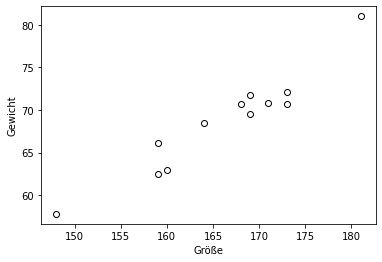

In [6]:
# Erzeuge Streudiagramm
fig, ax = plt.subplots()
ax.scatter(data["height"], data["weight"], color="white", edgecolor="k")
ax.set_xlabel("Größe")
ax.set_ylabel("Gewicht")

Die visuelle Inspektion bestätigt unsere Vermutung, dass die Beziehung zwischen der Größe und der Gewichtsvariable ungefähr linear ist. Mit anderen Worten: Mit zunehmender Größe neigt der einzelne Student dazu, ein höheres Gewicht zu haben.

### Überprüfung der Hypothesen

Zur Durchführung des **$t$-Test des Regressionskoeffizienten** folgen wir dem schrittweisen Durchführungsverfahren für Hypothesentests. Der **$t$-Test des Regressionskoeffizienten** folgt demselben schrittweisen Verfahren wie in den vorangegangenen Abschnitten beschrieben.

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn }p\le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}
$$

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass es keinen linearen Zusammenhang zwischen der Größe und dem Gewicht der Personen im Datensatz der Studierenden gibt.

$$H_0: \beta_1=0\text{ (die Vorhersagevariable ist für die Erstellung von Vorhersagen nicht geeignet)}$$

**Alternative Hypothese**

$$H_A: \beta_1\ne0\text{ (die Vorhersagevariable ist für die Erstellung von Vorhersagen geeignet)}$$

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,01$$

In [7]:
alpha = 0.01

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die obige Gleichung.

$$t =\frac{\beta_1}{s_b}= \frac{\beta_1}{s_e/\sqrt{\sum(x- \bar x)^2}}$$

wobei $\beta_1 = \frac{cov(x,y)}{var(x)}$, und

$$s_e = \sqrt{\frac{SSE}{n-2}}\text{,}$$

wobei $SSE = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y - \hat y)^2$. Die Teststatistik folgt einer $t$-Verteilung mit $df=n-2$. Um $\hat y = \beta_0+\beta_1x$ zu berechnen, müssen wir $\beta_0$ kennen, das als $\beta_0 = \bar y -\beta_1 \bar x$ berechnet wird.

Um nicht durch die verschiedenen Berechnungsschritte verwirrt zu werden, führen wir einen Schritt nach dem anderen durch.

- Erstellen Sie das lineare Modell durch Berechnung des Achsenabschnitts ($β_0$) und des Regressionskoeffizienten ($β_1$).

In [8]:
y_bar = data["weight"].mean()
x_bar = data["height"].mean()

# Lineares Modell
beta1 = np.cov(data["height"], data["weight"]) / data["height"].var()
beta1[0][1]

0.6507615230460922

In [9]:
beta0 = y_bar - beta1[0][1] * x_bar
beta0

-39.44320641282566

Berechnen Sie die Summe der quadrierten Fehler ($SSE$) und den Reststandardfehler ($s_e$).

In [10]:
# Berechne SSE
y_hat = beta0 + beta1[0][1] * data["height"]
SSE = sum((data["weight"] - y_hat) ** 2)
SSE

30.38618436873755

In [11]:
# Berechne Reststandardfehler
se = np.sqrt(SSE / (n - 2))
se

1.743163341994592

- Berechnen Sie den Wert der Teststatistik.

In [12]:
# Berechne Teststatistik
tw = beta1[0][1] / (se / np.sqrt(sum((data["height"] - x_bar) ** 2)))
tw

10.766100516207496

Der numerische Wert der Teststatistik ist $\approx 10,7661$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `t.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet.

$$df = n - 2= 10$$

In [13]:
# Berechne p-Wert
df = data.shape[0] - 2

# zweiseitiger Test
p_upper = t.sf(abs(tw), df=df)
p_lower = t.cdf(-abs(tw), df=df)
p = p_upper + p_lower
p

8.048424329265031e-07

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [14]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,01$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $1 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=8,0484243 \cdot 10^{-7}$. Bei einem Signifikanzniveau von $1 \%$ lassen die Daten den Schluss zu, dass die Variable Größe ein guter Schätzer für das Gewicht der Studenten ist.

### Hypothesentests in Python

Wir haben gerade einen **$t$-Test des Regressionskoeffizienten** in Python manuell berechnet. Das ist in Ordnung, aber wir können dasselbe in Python mit nur ein paar Zeilen Code tun!

Daher müssen wir die Funktion `linregress()` auf unsere Antwortvariable `weight` und unsere Vorhersagevariable `height` anwenden.

In [15]:
gradient, intercept, r_value, p_value, stderr = linregress(
    data["height"], data["weight"]
)
print("p-value", p_value)

p-value 8.048424329264974e-07


Für den Vergleich mit den manuell berechneten Werten extrahieren wir den Achsenabschnitt $\beta_0$ und die Steigung $\beta_1$

In [16]:
print(f"Achsenabschnitt: {intercept}")
print(f"Steigung:        {gradient}")

Achsenabschnitt: -39.44320641282566
Steigung:        0.6507615230460922


Vergleichen Sie die Ausgabe mit unseren Ergebnissen von oben. Sie passen perfekt!

In [12]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black

---------------------------------
Working on the host: Joachims-MacBook-Pro.local

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python


<Figure size 864x432 with 0 Axes>

## Inferenzstatistik - Der lineare Korrelationskoeffizienten
----------------------------------------

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import t, pearsonr

Um zu prüfen, ob zwei Variablen linear korreliert sind, d. h. ob eine lineare Beziehung zwischen den beiden Variablen besteht, können wir den so genannten **$t$-Test zur Prüfung des Korrelationskoeffizienten** anwenden. Der **lineare Korrelationskoeffizient der Grundgesamtheit**, $\rho$, misst die lineare Korrelation zweier Variablen auf die gleiche Weise wie der **lineare Korrelationskoeffizient der Stichprobe**, $r$, die lineare Korrelation zweier Variablen einer Stichprobe von Paaren misst. Sowohl $\rho$ als auch $r$ beschreiben die Stärke der linearen Beziehung zwischen zwei Variablen; $r$ ist jedoch eine Schätzung von $\rho$ der aus Stichprobendaten gewonnen wird.

Der lineare Korrelationskoeffizient von zwei Variablen liegt zwischen $-1$ und $1$. Bei $\rho=0$ sind die Variablen linear unkorreliert, es besteht also keine lineare Beziehung zwischen den Variablen. Bei $\rho \ne 0$ sind die Variablen linear korreliert. Wenn $\rho \gt 0$, sind die Variablen positiv linear korreliert, und wenn $\rho \lt 0$ sind die Variablen negativ linear korreliert.

Eine häufig verwendete Statistik zur Berechnung der linearen Beziehung zwischen quantitativen Variablen ist der <a href="https://de.wikipedia.org/wiki/Korrelationskoeffizient">Pearson-Produkt-Moment-Korrelationskoeffizient</a>. Er ist gegeben durch

$$r = \frac{\sum_{i=1}^n(x_i- \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n(x_i- \bar x)^2}\sqrt{\sum_{i=1}^n(y_i- \bar y)^2}}=\frac{s_{xy}}{s_x s_y}\text{,}$$

wobei $s_{xy}$ die Kovarianz von $x$ und $y$ ist und $s_x$ und $s_y$ die Standardabweichungen von $x$ bzw. $y$ sind.

Da der lineare Korrelationskoeffizient der Stichprobe, $r$ eine Schätzung des linearen Korrelationskoeffizienten der Grundgesamtheit, $\rho$, ist, können wir $r$ für einen Hypothesentest für $\rho$ verwenden. Die Teststatistik für einen Korrelationstest hat eine $t$-Verteilung mit $n-2$ Freiheitsgraden und kann wie folgt geschrieben werden

$$t= \frac{r}{\sqrt{\frac{1-r^2}{n-2}}}\text{.}$$

### Der $t$-test zur Prüfung des Korrelationskoeffizienten: Ein Beispiel

Um den $t$-Test für den Korrelationskoeffizienten zu üben, laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [25]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary.*

Um den $t$-Test für die Korrelation zu veranschaulichen, untersuchen wir die Beziehung zwischen den Variablen `score1` und `score2`, die das Ergebnis von zwei obligatorischen statistischen Prüfungen darstellen. **Die Frage ist, ob es eine lineare Beziehung zwischen den Noten von zwei aufeinanderfolgenden statistischen Prüfungen gibt?**

### Vorbereitung der Daten

Wir beginnen mit der Datenvorbereitung.

- Wir unterteilen den Datensatz anhand der Variablen `score1` und `score2`. Durch Anwendung der Funktion `dropna()` lassen wir alle `nan`-Werte im Datensatz aus.
- Dann ziehen wir aus jeder Teilmenge 50 Studierende und extrahieren die Variablen von Interesse.

In [26]:
n = 50
data = students.dropna()[["score1", "score2"]].sample(n, random_state=1)

score1 = data["score1"]
score2 = data["score2"]

Zum Zweck der visuellen Kontrolle stellen wir die Stichprobe in Form eines Streudiagramms dar.

Text(0, 0.5, 'score2')

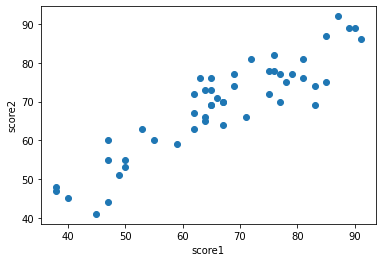

In [27]:
# Erzeuge Streudiagramm
fig, ax = plt.subplots()
ax.scatter(x=score1, y=score2)
ax.set_xlabel("score1")
ax.set_ylabel("score2")

Die visuelle Inspektion zeigt, dass eine positive lineare Beziehung zwischen den Variablen `score1` und `score2` besteht.

### Überprüfung der Hypothesen

Zur Durchführung des $t$-Tests für die Korrelation folgen wir dem schrittweisen Durchführungsverfahren für Hypothesentests. Der $t$-Test für die Korrelation folgt demselben schrittweisen Verfahren wie in den vorangegangenen Abschnitten beschrieben. 

\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn }p \le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass es keinen linearen Zusammenhang zwischen den Noten von zwei aufeinanderfolgenden Statistikprüfungen gibt.

$$H_0: r  = 0$$

Erinnern Sie sich daran, dass die Formulierung der Alternativhypothese vorgibt, ob wir einen zweiseitigen, einen links- oder einen rechtsseitigen Hypothesentest durchführen.

**Alternative Hypothese**

$$H_A: r \ne 0$$

Diese Formulierung führt zu einem zweiseitigen Hypothesentest.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,01$$

In [28]:
alpha = 0.01

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die obige Gleichungsform:

$$t= \frac{r}{\sqrt{\frac{1-r^2}{n-2}}}$$

In [29]:
n = len(score1)

# Berechne Teststatistik
# Berechne PearsonKorrelationskoefficient r
r = np.corrcoef(score1, score2)[0][1]

# Teststatistik
tw = r / np.sqrt((1 - r**2) / (n - 2))
tw

14.846357121994247

Der numerische Wert der Teststatistik ist $14,846357$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `t.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet:

$$df = n - 2= 48$$

In [30]:
# Berechne den p-Wert
df = len(score1) - 2

# zweiseitiger Test
p_upper = t.sf(abs(tw), df=df)
p_lower = t.cdf(-abs(tw), df=df)
p = p_upper + p_lower
p

1.4401962006630608e-19

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [31]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,01$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $1 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=1,4401962 \cdot 10^{-19}$. Bei einem Signifikanzniveau von $1 \%$ lassen die Daten den Schluss zu, dass die Prüfungsnoten der Studenten linear korreliert sind.

### Hypothesentests in Python

Wir haben soeben einen $t$-test zur Prüfung des Korrelationskoeffizienten in Python manuell durchgeführt. Wir können dasselbe in Python mit nur einer Zeile Code tun!

Dazu wenden wir die Funktion `pearsonr()` an. Für die Funktion verwenden wir die zwei Vektoren, `score1` und `score2`, als Dateneingabe.

In [32]:
r, p_value = pearsonr(score1, score2)
print(f"Korrelationskoeffizient: {r}")
print(f"p - Wert:                {p_value}")

Korrelationskoeffizient: 0.9061854032279849
p - Wert:                1.4401962006631032e-19


Perfekt! Vergleichen Sie die Ausgabe der Funktion `pearsonr()` mit unserem Ergebnis von oben. Darüber hinaus gibt die Funktion den Pearson-Korrelationskoeffizienten für die Beispieldaten aus. Aus der Ausgabe der Funktion `pearsonr()` können wir schließen, dass die Daten bei einem Signifikanzniveau von $1 \%$ sehr starke Hinweise darauf liefern, dass die Prüfungsnoten der Studenten linear korreliert sind.